# Data Pre-processing, Logistic Regression and Evaluation

Here's something that many people confuse about Logistic Regression. Why other categoriszation methods like Decision Trees, Random Forest, Gradient Boosting come under Machine Learning but Logistic comes under Regression? It is because Machine Learning Models make prediction after they have been trained by the data that has been fed to them. These models can now only predict from values that are present within that range of values that has been fed to them. Regression on the other hand can also predict outcomes for values that have been fed outside its training data range. Logistic Regression model finds the best fit for the data and then make predictions based on the best fit sigmoid function.

For this project, I will be working on an Airline's data to check customer satisfaction.
We will take the following steps to execute this whole project:
* Exploring the data and completing the cleaning process
* Pre-processing the data before building a logistic regression model
* Building a binomial logistic regression model 
* Evaluating a binomial logistic regression model using a confusion matrix

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_original = pd.read_csv("Invistico_Airline.csv")
df_original.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


## Exploratory Data Analysis

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

There seems to be some Null values in 'Arrival Delay in Minutes' column. Let us check further.

In [4]:
df_original.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

Since there ere some missing values in `Arrival Delay in Minutes`, let us clean our dataset by removing all the missing values.

In [5]:
df_subset = df_original.dropna()

## Pre-processing the data

First, let us check if there's any class imbalance in the outcome variable. A good reason to do this step is because class imbalance can cause less available data to train our regression model for a particular class. This can cause a bias in our modeling. If we have class imbalance, we can resample our data (under-sampling the majority class or over-sampling the minority class).

In [6]:
print(df_subset['satisfaction'].value_counts())
print()
print(df_subset['satisfaction'].value_counts(normalize=True)*100)

satisfied       70882
dissatisfied    58605
Name: satisfaction, dtype: int64

satisfied       54.74063
dissatisfied    45.25937
Name: satisfaction, dtype: float64


Since, there was no class imbalance, we don't need to resample our data.

Let us convert the `Inflight Entertainment` and `satisfaction` variables into float as when the regression model is built, we need float type values. This because Logistic Regression generates a probability graph of continuous values and not ordinal values.

In [7]:
df_subset["Inflight entertainment"] = df_subset["Inflight entertainment"].astype(float)

In [8]:
df_subset["satisfaction"] = df_subset["satisfaction"].astype('category').cat.codes.astype(float)

In [9]:
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


Let us first split the available data into a training dataset and a test dataset.

In [10]:
from sklearn.model_selection import train_test_split

Y = df_subset[["satisfaction"]]
X = df_subset[["Inflight entertainment"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Model building

Let us now fit our regression model with our training dataset.

In [11]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, Y_train)

Let us now create a regression plot of our model to visualize results using the seaborn package.

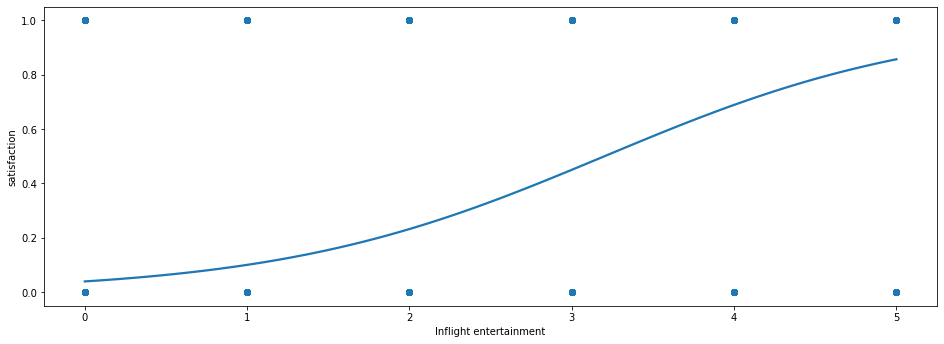

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5.5))
sns.regplot(x="Inflight entertainment", y="satisfaction", data=df_subset, logistic=True, ci=None)
plt.show()

## Evaluation and Results

Let us now predict our outcome variable by passing the test independent variables to our model.

In [13]:
y_pred = clf.predict(X_test)

In [14]:
print(y_pred)

[1. 0. 0. ... 0. 0. 0.]


In [15]:
clf.predict_proba(X_test)

array([[0.14258068, 0.85741932],
       [0.55008402, 0.44991598],
       [0.89989329, 0.10010671],
       ...,
       [0.89989329, 0.10010671],
       [0.76826225, 0.23173775],
       [0.55008402, 0.44991598]])

Let us now check how well the dependent variable was predicted based on the model's accuracy, precision, recall, and F1 score.

In [16]:
import sklearn.metrics as metrics

print("Precision :", str(round(metrics.precision_score(Y_test, y_pred), 4)*100) + "%")
print("Recall :", str(round(metrics.recall_score(Y_test, y_pred), 4)*100) + "%")
print("Accuracy :", str(round(metrics.accuracy_score(Y_test, y_pred), 4)*100) + "%")
print("F1 Score :", str(round(metrics.f1_score(Y_test, y_pred), 4)*100) + "%")

Precision : 81.61%
Recall : 82.15%
Accuracy : 80.15%
F1 Score : 81.88%


Let us plot a confusion matrix to evaluate using visualization of how well our model has predicted the results.

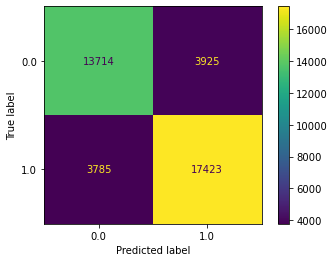

In [17]:
cm = metrics.confusion_matrix(Y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot(values_format="d")
plt.show()

We can observe that there are:
* 13,714 True Negatives
* 17,423 True Positives
* 3,785 False Negatives
* 3,925 False Positives